<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>Logistic Regression - Hearing Dataset</b></p>

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn.metrics import get_scorer_names
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <font color='orange'> <b>Loading Dataset</b><font color='black'>  

In [25]:
df = pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


# <font color='orange'> <b>EDA</b><font color='black'>  

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [31]:
df.test_result.value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

**This is a balanced data.**

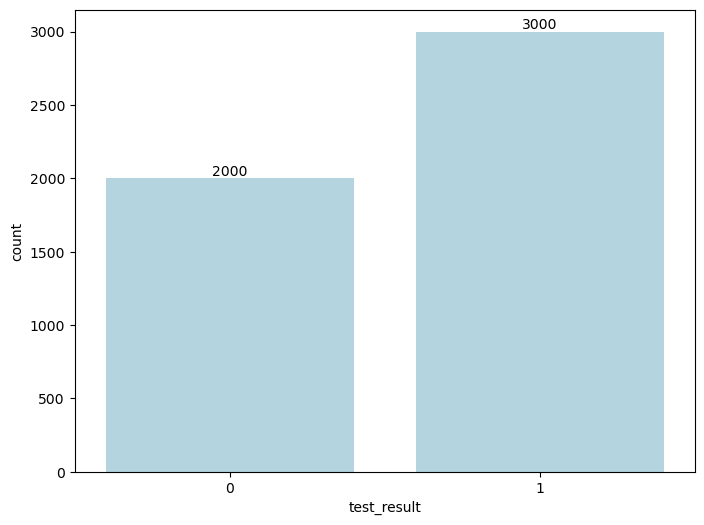

In [56]:
ax = sns.countplot(x='test_result', data=df, color= "lightblue")
ax.bar_label(ax.containers[0]);

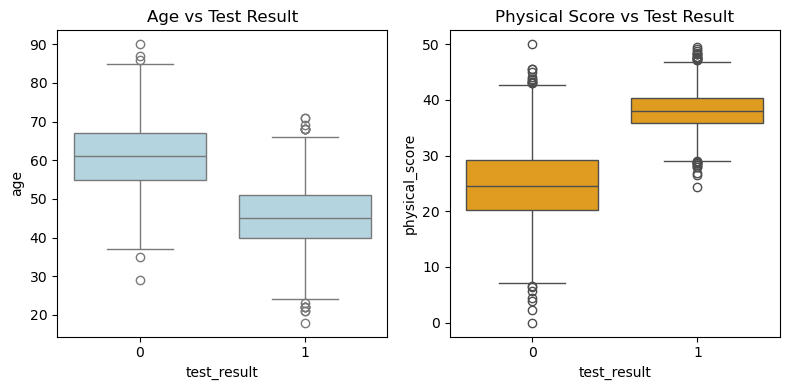

In [54]:
fig, axes = plt.subplots(1,2, figsize=(8, 4))

sns.boxplot(x="test_result", y="age", data=df, color="lightblue", ax=axes[0])
axes[0].set_title("Age vs Test Result")

sns.boxplot(x="test_result", y="physical_score", data=df, color="orange", ax=axes[1])
axes[1].set_title("Physical Score vs Test Result")

plt.tight_layout()
plt.show()

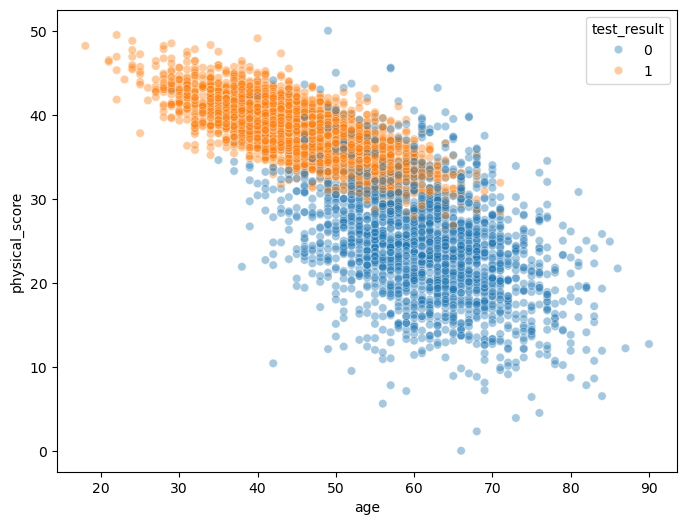

In [58]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.4)
plt.show()

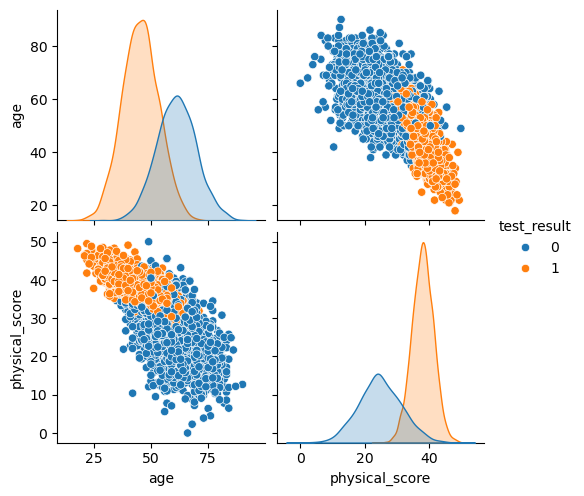

In [40]:
sns.pairplot(df, hue="test_result");

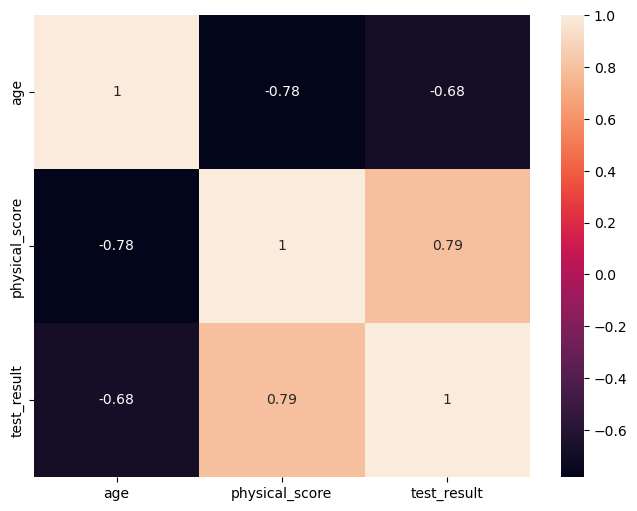

In [60]:
sns.heatmap(df.corr(), annot=True);

# <font color='orange'> <b>Defining X and y</b><font color='black'>  

In [63]:
X = df.drop(columns="test_result")
y = df.test_result

# <font color='orange'> <b>Train-Test Split</b><font color='black'>  

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

# <font color='orange'> <b>Modeling</b><font color='black'>  

## <font color='gold'> <b>With Pipline</b><font color='black'>  

In [68]:
operations= [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

In [70]:
pipe_model = Pipeline(steps=operations)

In [72]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [74]:
pipe_model["logistic"].coef_

array([[-0.9039212 ,  3.48681952]])

In [76]:
y_pred = pipe_model.predict(X_test)

In [80]:
y_pred_proba = pipe_model.predict_proba(X_test)

# predict_proba shows with what probability the observations in the test data are assigned to which class.
# The first value indicates the probability of belonging to class 0, while the second value indicates the probability of belonging to class 1.
# Whichever value is larger is assigned to that class.

In [82]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data["pred"] = y_pred
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
231,55.000,31.600,1,0.438,0
2847,48.000,37.200,1,0.938,1
4824,31.000,43.200,1,0.999,1
2025,56.000,33.500,1,0.619,1
1388,59.000,28.200,0,0.116,0
1377,70.000,32.000,0,0.218,0
3335,54.000,22.800,0,0.019,0
1807,41.000,41.600,1,0.994,1
928,28.000,41.000,1,0.997,1
1702,50.000,39.600,1,0.973,1


In [84]:
# To bring up all the wrong predictions made.
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

,age,physical_score,test_result,pred_proba,pred
2371,46.000,36.400,0,0.926,1
618,63.000,33.400,1,0.470,0
2145,65.000,35.200,0,0.621,1
3200,60.000,32.900,1,0.477,0
1726,46.000,36.700,0,0.934,1
...,...,...,...,...,...
2420,60.000,32.500,1,0.434,0
3917,48.000,33.400,0,0.747,1
2452,61.000,33.600,0,0.532,1
1845,50.000,31.900,0,0.569,1


### <font color='gold'> <b>Model Performance</b><font color='black'>  

- **accuracy_score:** Calculates the model's accuracy rate.
- **precision_score:** Calculates the ratio of correct positive predictions to total positive predictions.
- **recall_score:** Calculates the ratio of true positive predictions to total true positives.
- **f1_score:** Calculates the harmonic mean of Precision and Recall.
- **log_loss:** Calculates the model's accuracy loss based on the probabilities of the predictions.

In [90]:
accuracy_score(y_test, y_pred)

0.917

In [98]:
pipe_model.score(X_test, y_test)

# When we enter X_test, y_test into the score function, it returns the accuracy score.

0.917

In [94]:
precision_score(y_test, y_pred, pos_label=1)

# Shows how many of the guesses were made as 1 when they were actually 1.

0.9126365054602185

In [96]:
precision_score(y_test, y_pred, pos_label=0)

# Shows how many of the guesses were made as 0 when they were actually 0.

0.924791086350975

In [100]:
recall_score(y_test, y_pred, pos_label=1)

0.9558823529411765

In [102]:
f1_score(y_test, y_pred, pos_label=1)

0.9337589784517158

In [104]:
confusion_matrix(y_test, y_pred)

array([[332,  56],
       [ 27, 585]], dtype=int64)

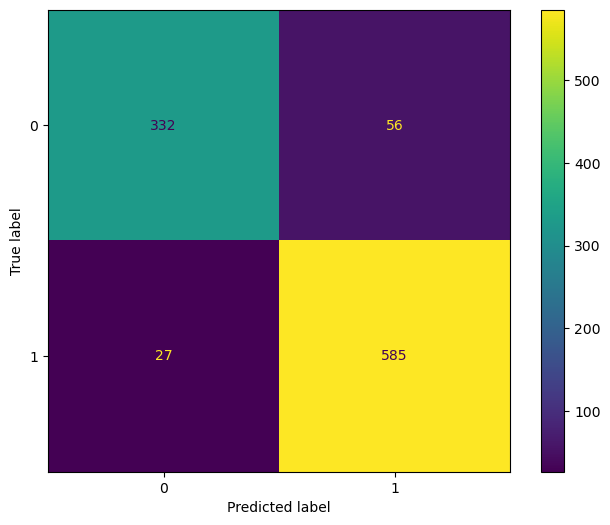

In [106]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

In [108]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[332  56]
 [ 27 585]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000


Train_Set
[[1401  211]
 [ 128 2260]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000



## <font color='gold'> <b>Cross Validation</b><font color='black'>  

In [113]:
scorers_list = get_scorer_names()
print(scorers_list)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc',

In [117]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] # scores after CV

test_accuracy     0.915
train_accuracy    0.916
test_precision    0.914
train_precision   0.915
test_recall       0.947
train_recall      0.947
test_f1           0.930
train_f1          0.930
dtype: float64

## <font color='gold'> <b>ROC (Receiver Operating Curve) | PRC (Presicion Recall Curve) | AUC (Area Under Curve)</b><font color='black'>  

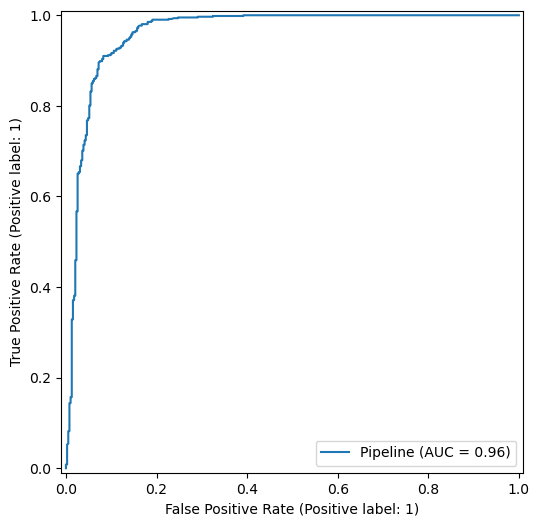

In [120]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

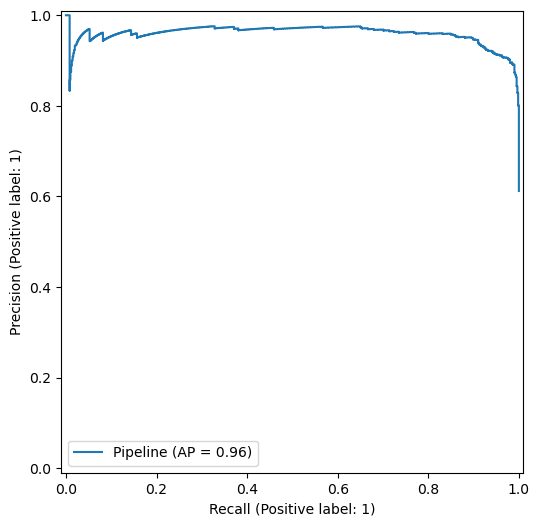

In [122]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

# <font color='orange'> <b>Final Model</b><font color='black'>  

In [127]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps= operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [129]:
import pickle

In [134]:
# saving final_model
pickle.dump(final_model, open("final_model", "wb"))

# <font color='orange'> <b>Prediction</b><font color='black'>  

In [138]:
# reading the final_model
new_model = pickle.load(open("final_model", "rb"))

In [140]:
my_dict = {"age": [25, 35, 45, 55, 65],
           "physical_score": [45, 35, 25, 15, 5]}

In [142]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,25,45
1,35,35
2,45,25
3,55,15
4,65,5


In [148]:
predictions = new_model.predict(sample)
predictions

array([1, 1, 0, 0, 0], dtype=int64)

In [154]:
predictions_proba = new_model.predict_proba(sample)
predictions_proba[:,1]

array([9.99619229e-01, 9.40830548e-01, 8.78466400e-02, 5.82971694e-04,
       3.53299172e-06])

In [156]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,25,45,1,1.000
1,35,35,1,0.941
2,45,25,0,0.088
3,55,15,0,0.001
4,65,5,0,0.000


<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>